In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

#Error Metrics
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 


%matplotlib inline

# imports necessary for dimensionality reduction
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import FactorAnalysis

from sklearn import metrics
from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_recall_fscore_support


#Silhouette method
from sklearn.metrics import silhouette_score

# Regression and classification algorithms
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor, NeighborhoodComponentsAnalysis, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression

#Clssification


# metrics for evaluating regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

Importing data

In [ ]:
df = pd.read_csv('./StockMarketDataTesla.csv')
df_sentiment =  pd.read_csv('./PREDICTED_SENTIMENT.csv')

In [ ]:
import datetime
def changeDateFormat(row):
  row.Date =  datetime.datetime.strptime(str(row.Date).split()[0], "%d-%m-%Y").strftime("%Y-%m-%d")
  return row

df_sentiment=df_sentiment.apply(changeDateFormat, axis=1)
df_sentiment.sort_values(by='Date', inplace=True)


In [ ]:

df.reset_index(drop=True, inplace=True)
df_sentiment.reset_index(drop=True, inplace=True)
df =  pd.merge(df,df_sentiment, on="Date")
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Research Development,Income Before Tax,...,Net Receivables,Long Term Debt,Inventory,Accounts Payable,Long Term Investments,Target,Positive,Negative,Neutral,Label
0,2018-01-09,67.03,67.76,65.48,66.74,35733000.0,0.0,0.0,1.460000e+09,-1.005000e+09,...,9.490000e+08,8.461000e+09,3.113000e+09,3.405000e+09,12000000.0,DOWN,0.051453,0.051624,0.896924,Negative
1,2018-01-29,67.97,70.17,67.66,69.91,23735500.0,0.0,0.0,1.460000e+09,-1.005000e+09,...,9.490000e+08,8.461000e+09,3.113000e+09,3.405000e+09,12000000.0,UP,0.073506,0.036434,0.890060,Positive
2,2018-01-31,69.50,71.24,69.04,70.86,31070500.0,0.0,0.0,1.460000e+09,-1.005000e+09,...,9.490000e+08,8.461000e+09,3.113000e+09,3.405000e+09,12000000.0,UP,0.057328,0.025493,0.917179,Positive
3,2018-03-07,65.09,66.50,64.35,66.46,25036500.0,0.0,0.0,1.460000e+09,-1.005000e+09,...,9.490000e+08,8.461000e+09,3.113000e+09,3.405000e+09,12000000.0,UP,0.105883,0.032860,0.861258,Positive
4,2018-03-20,62.97,63.25,61.75,62.11,23821500.0,0.0,0.0,1.460000e+09,-1.005000e+09,...,9.490000e+08,8.461000e+09,3.113000e+09,3.405000e+09,12000000.0,DOWN,0.041082,0.027480,0.931438,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,2022-05-19,707.00,734.00,694.11,709.42,30098900.0,0.0,0.0,2.593000e+09,6.343000e+09,...,1.986000e+09,4.285000e+09,5.757000e+09,1.002500e+10,NaN,UP,0.079623,0.071458,0.848919,Positive
749,2022-05-20,713.99,721.58,633.00,663.90,48324400.0,0.0,0.0,2.593000e+09,6.343000e+09,...,1.986000e+09,4.285000e+09,5.757000e+09,1.002500e+10,NaN,DOWN,0.073798,0.096653,0.829548,Negative
750,2022-05-23,655.02,679.96,638.06,674.90,29634500.0,0.0,0.0,2.593000e+09,6.343000e+09,...,1.986000e+09,4.285000e+09,5.757000e+09,1.002500e+10,NaN,UP,0.075230,0.078415,0.846355,Negative
751,2022-05-24,653.53,653.92,620.57,628.16,29697500.0,0.0,0.0,2.593000e+09,6.343000e+09,...,1.986000e+09,4.285000e+09,5.757000e+09,1.002500e+10,NaN,DOWN,0.085092,0.116204,0.798704,Negative


In [ ]:
df.isna().sum()

Date                                        0
Open                                        0
High                                        0
Low                                         0
Close                                       0
Volume                                      0
Dividends                                   0
Stock Splits                                0
Research Development                        0
Income Before Tax                           0
Minority Interest                           0
Net Income                                  0
Selling General Administrative              0
Gross Profit                                0
Ebit                                        0
Operating Income                            0
Other Operating Expenses                    0
Interest Expense                            0
Income Tax Expense                          0
Total Revenue                               0
Total Operating Expenses                    0
Cost Of Revenue                   

In [ ]:
df = df.drop(df.columns[[32,46,51]], axis=1)

Encoding of Ordinal Features

In [ ]:
# Create a mapper

scale_mapper = {
    "DOWN": 0,
    "UP": 1 
    }

df['Target'] = df['Target'].replace(scale_mapper)
scale_mapper = {
    "Negative": 0,
    "Positive": 1 
    }
df['Label'] = df['Label'].replace(scale_mapper)


In [ ]:
'''plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()'''
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Research Development,Income Before Tax,...,Net Tangible Assets,Net Receivables,Long Term Debt,Inventory,Accounts Payable,Target,Positive,Negative,Neutral,Label
0,2018-01-09,67.03,67.76,65.48,66.74,35733000.0,0.0,0.0,1.460000e+09,-1.005000e+09,...,4.573000e+09,9.490000e+08,8.461000e+09,3.113000e+09,3.405000e+09,0,0.051453,0.051624,0.896924,0
1,2018-01-29,67.97,70.17,67.66,69.91,23735500.0,0.0,0.0,1.460000e+09,-1.005000e+09,...,4.573000e+09,9.490000e+08,8.461000e+09,3.113000e+09,3.405000e+09,1,0.073506,0.036434,0.890060,1
2,2018-01-31,69.50,71.24,69.04,70.86,31070500.0,0.0,0.0,1.460000e+09,-1.005000e+09,...,4.573000e+09,9.490000e+08,8.461000e+09,3.113000e+09,3.405000e+09,1,0.057328,0.025493,0.917179,1
3,2018-03-07,65.09,66.50,64.35,66.46,25036500.0,0.0,0.0,1.460000e+09,-1.005000e+09,...,4.573000e+09,9.490000e+08,8.461000e+09,3.113000e+09,3.405000e+09,1,0.105883,0.032860,0.861258,1
4,2018-03-20,62.97,63.25,61.75,62.11,23821500.0,0.0,0.0,1.460000e+09,-1.005000e+09,...,4.573000e+09,9.490000e+08,8.461000e+09,3.113000e+09,3.405000e+09,0,0.041082,0.027480,0.931438,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,2022-05-19,707.00,734.00,694.11,709.42,30098900.0,0.0,0.0,2.593000e+09,6.343000e+09,...,2.973200e+10,1.986000e+09,4.285000e+09,5.757000e+09,1.002500e+10,1,0.079623,0.071458,0.848919,1
749,2022-05-20,713.99,721.58,633.00,663.90,48324400.0,0.0,0.0,2.593000e+09,6.343000e+09,...,2.973200e+10,1.986000e+09,4.285000e+09,5.757000e+09,1.002500e+10,0,0.073798,0.096653,0.829548,0
750,2022-05-23,655.02,679.96,638.06,674.90,29634500.0,0.0,0.0,2.593000e+09,6.343000e+09,...,2.973200e+10,1.986000e+09,4.285000e+09,5.757000e+09,1.002500e+10,1,0.075230,0.078415,0.846355,0
751,2022-05-24,653.53,653.92,620.57,628.16,29697500.0,0.0,0.0,2.593000e+09,6.343000e+09,...,2.973200e+10,1.986000e+09,4.285000e+09,5.757000e+09,1.002500e+10,0,0.085092,0.116204,0.798704,0


# EDA - Exploratory Data Analysis


In [ ]:
print("Total number of days: ",df.shape[0])
print("Total number of fields: ",df.shape[1])

Total number of days:  753
Total number of fields:  54



Find the duration of dataset

In [ ]:
# convert date field from string to Date format 
df['Date'] = pd.to_datetime(df.Date)
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Research Development,Income Before Tax,...,Net Tangible Assets,Net Receivables,Long Term Debt,Inventory,Accounts Payable,Target,Positive,Negative,Neutral,Label
0,2018-01-09,67.03,67.76,65.48,66.74,35733000.0,0.0,0.0,1.460000e+09,-1.005000e+09,...,4.573000e+09,949000000.0,8.461000e+09,3.113000e+09,3.405000e+09,0,0.051453,0.051624,0.896924,0
1,2018-01-29,67.97,70.17,67.66,69.91,23735500.0,0.0,0.0,1.460000e+09,-1.005000e+09,...,4.573000e+09,949000000.0,8.461000e+09,3.113000e+09,3.405000e+09,1,0.073506,0.036434,0.890060,1
2,2018-01-31,69.50,71.24,69.04,70.86,31070500.0,0.0,0.0,1.460000e+09,-1.005000e+09,...,4.573000e+09,949000000.0,8.461000e+09,3.113000e+09,3.405000e+09,1,0.057328,0.025493,0.917179,1
3,2018-03-07,65.09,66.50,64.35,66.46,25036500.0,0.0,0.0,1.460000e+09,-1.005000e+09,...,4.573000e+09,949000000.0,8.461000e+09,3.113000e+09,3.405000e+09,1,0.105883,0.032860,0.861258,1
4,2018-03-20,62.97,63.25,61.75,62.11,23821500.0,0.0,0.0,1.460000e+09,-1.005000e+09,...,4.573000e+09,949000000.0,8.461000e+09,3.113000e+09,3.405000e+09,0,0.041082,0.027480,0.931438,1


In [ ]:
print("Starting date: ",df.iloc[0][0])
print("Ending date: ", df.iloc[-1][0])
print("Duration: ", df.iloc[-1][0]-df.iloc[0][0])

Starting date:  2018-01-09 00:00:00
Ending date:  2022-05-25 00:00:00
Duration:  1597 days 00:00:00



Monthwise comparision between Stock open and close price

In [ ]:
monthvise= df.groupby(df['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,474.339483,471.547414
February,486.117647,485.927059
March,414.202000,414.537571
April,461.598056,458.110139
May,325.243750,322.421250
June,239.020182,238.788364
July,287.012121,286.344091
August,342.380526,343.733333
September,352.567049,352.471967


In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [ ]:
from itertools import cycle
import plotly.express as px

names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig =px.line(df, x=df.Date, y=[df['Open'], df['Close'], 
                                          df['High'], df['Low']],
            labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

What was the moving average of the various stocks?

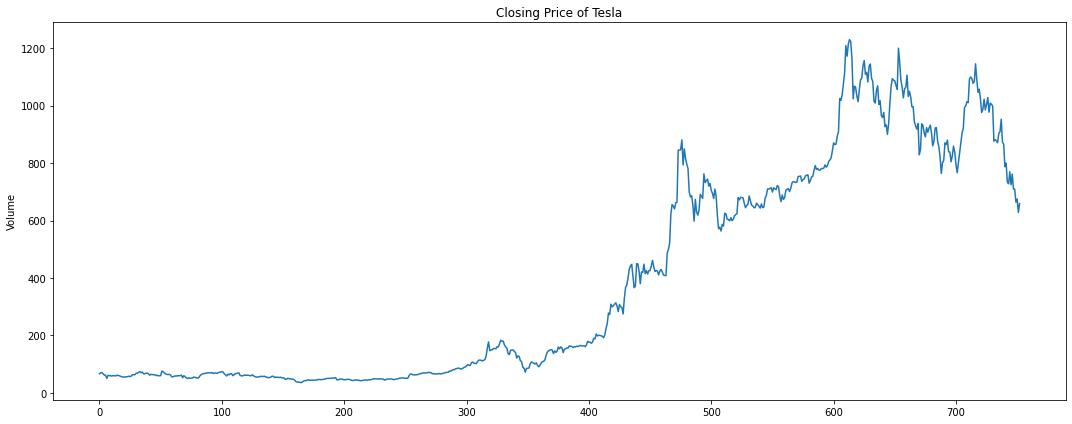

In [ ]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 6))
df['Close'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title(f"Closing Price of Tesla")
    
plt.tight_layout()

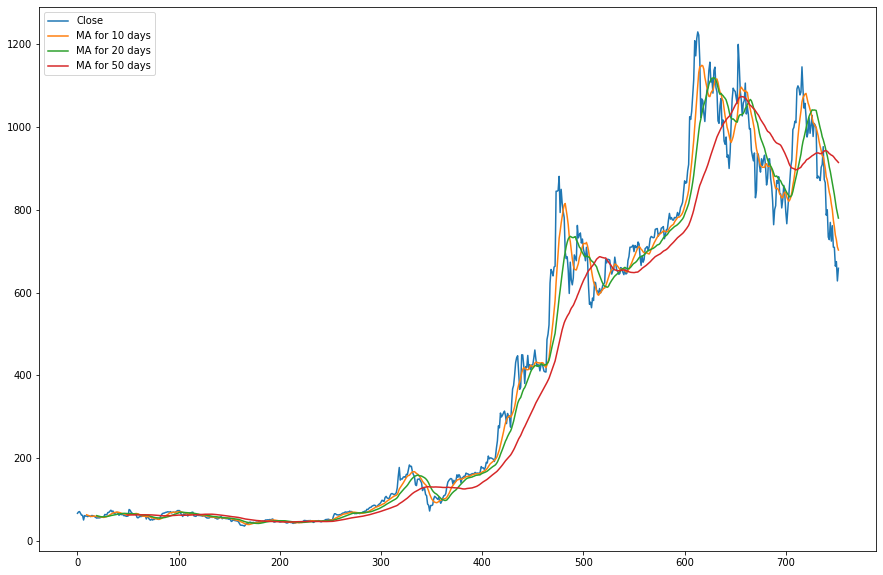

In [ ]:
ma_day = [10, 20, 50,100]
df_moving_average = pd.DataFrame(df['Close'])
df_moving_average
for ma in ma_day:
  column_name = f"MA for {ma} days"
  df_moving_average[column_name] = df['Close'].rolling(ma).mean()

df_moving_average

df_moving_average[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(figsize=(15, 10))


What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

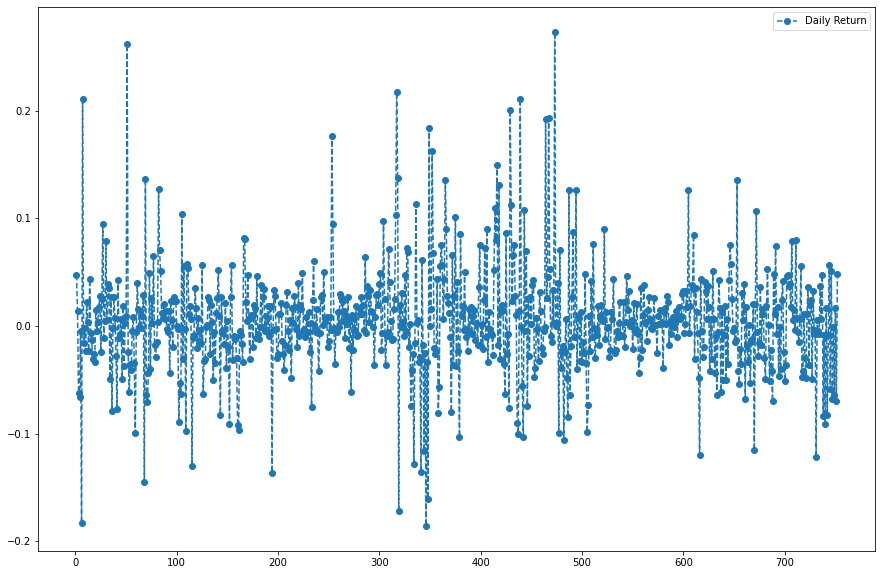

In [ ]:
# We'll use pct_change to find the percent change for each day
df_daily_return = pd.DataFrame()
df_daily_return['Daily Return'] = df['Close'].pct_change()

# Then we'll plot the daily return percentage


df_daily_return['Daily Return'].plot(legend=True, linestyle='--', marker='o',figsize=(15, 10))

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

Text(0, 0.5, 'Daily Return')

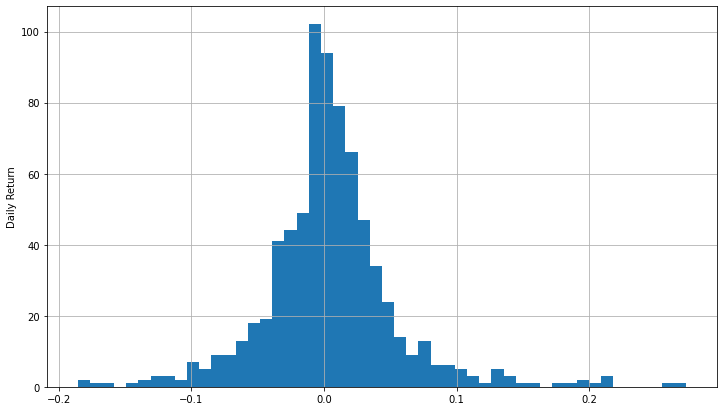

In [ ]:
plt.figure(figsize=(12, 7))

df_daily_return['Daily Return'].hist(bins=50)
plt.ylabel('Daily Return')
    

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


# Experiment 1

### Research Question - When a model is trained using only historical time series data for a specific stock, what is the most effective method for forecasting stock prices and trends?

## Regression

In [3]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import seaborn as sns
from datetime import date


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 652 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [4]:

# Import yfinance package
!pip install yfinance
import yfinance as yf
#Set Ticker 
ticker = 'TSLA'
stock = yf.Ticker(ticker)

# get historical market data
hist = stock.history(period="max")

# Set the start and end date
start_date = '2018-01-01'
end_date = today = date.today()

# Get the data
df_1 = stock.history(period ='max', rounding=True, start=start_date, end = end_date)


df_1.reset_index(inplace=True)
df_1_backup = df_1
df_1.info()
df_1.head()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1157 non-null   datetime64[ns]
 1   Open          1157 non-null   float64       
 2   High          1157 non-null   float64       
 3   Low           1157 non-null   float64       
 4   Close         1157 non-null   float64       
 5   Volume        1157 non-null   int64         
 6   Dividends     1157 non-null   int64         
 7   Stock Splits  1157 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 72.4 KB


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-01-02,62.40,64.42,62.20,64.11,21761000,0,0.0
1,2018-01-03,64.20,65.05,63.11,63.45,22607500,0,0.0
2,2018-01-04,62.57,63.71,61.14,62.92,49731500,0,0.0
3,2018-01-05,63.32,63.45,62.40,63.32,22956000,0,0.0
4,2018-01-08,63.20,67.40,63.10,67.28,49297000,0,0.0


In [5]:
def labelDataset(row):
  if row.Close-row.Open > 0:
    target=1
  else:
    target=0
  row['Target'] = target
  return row
df_1=df_1.apply(labelDataset, axis=1) 

In [6]:
# Splitting data using split function as we need to maintain the order of the date
train_set, test_set= np.split(df_1, [int(.67 *len(df_1))])


In [7]:
# Split the dataset
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

X_train_bkup = train_set
X_test_bkup = test_set
y_train = train_set['Close']
X_train = train_set.drop(columns=['Date','Close'])

y_test =  test_set['Close']
X_test = test_set.drop(columns=['Date','Close'])

### Preprocessing Pipeline

In [8]:
# store a list with the names of all predictors

names_all = [c for c in  df_1 if c not in ['Close','Date']]
names_no_outliers = list(set(names_all))


In [9]:
class AddColumnNames(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return pd.DataFrame(data=X, columns=self.columns)

In [10]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        return X[self.columns]

In [11]:
preprocess_pipeline = make_pipeline(
    AddColumnNames(columns=names_all),
    FeatureUnion(transformer_list=[
        ("no_outlier_columns", make_pipeline(
            ColumnSelector(columns=names_no_outliers),
            StandardScaler()
        ))
    ])
)

In [12]:
print(X_train.shape)
print(y_train.shape)

(775, 7)
(775,)


In [13]:
# create the pipeline
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                       ('regresson', RandomForestRegressor(n_estimators=10))])
# prepare a prameter grid
N_FEATURES_OPTIONS = [2, 6, 11]
MAX_DEPTH_OPTIONS = [2, 4, 6, 8]


param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'regresson__max_depth': MAX_DEPTH_OPTIONS,

    },
    {
        'reduce_dim': [RFE(svm.SVR(kernel='linear', gamma='auto')),RFE(LinearRegression())],
        'reduce_dim__n_features_to_select': N_FEATURES_OPTIONS,
        'regresson__max_depth': MAX_DEPTH_OPTIONS
    }  
]

search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5, refit=True)
search.fit(X_train, y_train)

print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
RF_best_params = search.best_params_
RF_best_model = search.best_estimator_

Best CV score = 0.057:
Best parameters:  {'reduce_dim': RFE(estimator=LinearRegression(), n_features_to_select=2), 'reduce_dim__n_features_to_select': 2, 'regresson__max_depth': 8}


In [14]:
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                       ('regresson', LinearRegression())])

N_FEATURES_OPTIONS = [1, 2, 2]
NORMALIZE_OPTIONS = [False]

param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=1)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'regresson__normalize': NORMALIZE_OPTIONS
    },
    {
        'reduce_dim': [RFE(svm.SVR(kernel='linear', gamma='auto')),RFE(LinearRegression())],
        'reduce_dim__n_features_to_select': N_FEATURES_OPTIONS,
        'regresson__normalize': NORMALIZE_OPTIONS
    }  
]

search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5, refit=True)
search.fit(X_train, y_train)
print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
LR_best_params = search.best_params_
LR_best_model = search.best_estimator_

Best CV score = 0.984:
Best parameters:  {'reduce_dim': RFE(estimator=SVR(gamma='auto', kernel='linear'), n_features_to_select=2), 'reduce_dim__n_features_to_select': 2, 'regresson__normalize': False}


In [15]:
# create the pipeline
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), ('knn', KNeighborsRegressor())])

param_grid = {
'knn__n_neighbors': list(range(1, 31))
}

search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5, refit=True)
search.fit(X_train, y_train) #trainign happens here!

print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
KNN_best_params = search.best_params_
KNN_best_model = search.best_estimator_

Best CV score = -0.733:
Best parameters:  {'knn__n_neighbors': 3}


In [16]:
# create the pipeline
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), ('dec', DecisionTreeRegressor())])


param_grid = {
'dec__criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"],
'dec__max_depth': [2,4,6,8,10]  
}

search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5, refit=True)
search.fit(X_train, y_train) #trainig happens here!

print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
DEC_best_params = search.best_params_
DEC_best_model = search.best_estimator_

Best CV score = 0.070:
Best parameters:  {'dec__criterion': 'absolute_error', 'dec__max_depth': 8}


In [17]:
mean_fpr = np.linspace(start=0, stop=1, num=100)

In [18]:
# model - a trained regression model

def evaluate_model(X_test, y_test, model):
    
    # compute predictiond for the test set
    _predicted_values = model.predict(X_test)
        
    # compute metrics
    _mse = mean_squared_error(y_test, _predicted_values)
    _mae = mean_absolute_error(y_test, _predicted_values)
    _r2 = r2_score(y_test, _predicted_values)
            
    return _mse, _mae, _r2, _predicted_values

In [19]:
RF_mse, RF_mae, RF_r2, RF_predicted_values = evaluate_model(X_test, y_test, RF_best_model)
LR_mse, LR_mae, LR_r2, LR_predicted_values = evaluate_model(X_test, y_test, LR_best_model)
KNN_mse, KNN_mae, KNN_r2, KNN_predicted =  evaluate_model(X_test, y_test, KNN_best_model)
DEC_mse, DEC_mae, DEC_r2, DEC_predicted =  evaluate_model(X_test, y_test, DEC_best_model)



In [20]:
print(LR_mse, LR_mae, LR_r2)

274.73075814225535 12.113769156233214 0.9892599537955999


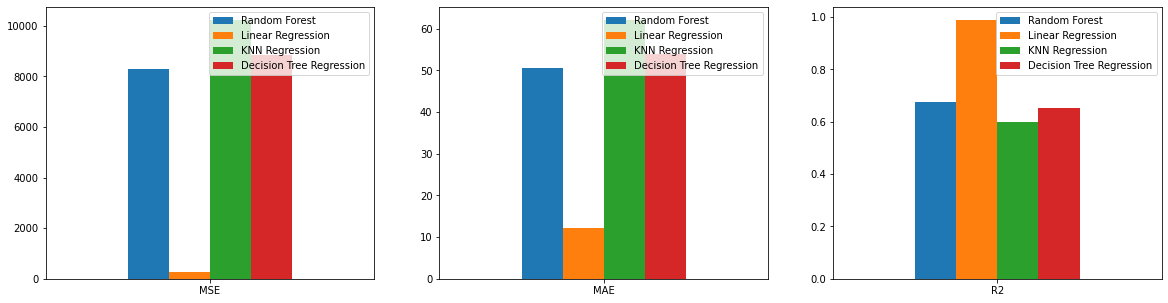

In [21]:
df_mse = pd.DataFrame({'Random Forest': RF_mse, 'Linear Regression': LR_mse, 'KNN Regression' : KNN_mse, 'Decision Tree Regression' : DEC_mse}, index=['MSE'])
df_mae = pd.DataFrame({'Random Forest': RF_mae, 'Linear Regression': LR_mae, 'KNN Regression' : KNN_mae, 'Decision Tree Regression' : DEC_mae}, index=['MAE'])
df_r2 = pd.DataFrame({'Random Forest': RF_r2, 'Linear Regression': LR_r2, 'KNN Regression': KNN_r2, 'Decision Tree Regression' : DEC_r2}, index=['R2'])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

df_mse.plot.bar(rot=0, ax=axes[0])
df_mae.plot.bar(rot=0, ax=axes[1])
df_r2.plot.bar(rot=0, ax=axes[2])

plt.show()

In [22]:
from itertools import cycle
import plotly.express as px
#LR_inverse =  scalar.inverse_transform(pd.DataFrame(LR_predicted_values))
#RF_inverse =  scalar.inverse_transform(pd.DataFrame(RF_predicted_values))
names = cycle(['Linear Regression','RandomForest', 'KNN','Decision tree','Actual'])

fig =px.line(df_1, x=X_test_bkup.Date, y=[LR_predicted_values, RF_predicted_values,KNN_predicted, DEC_predicted, y_test],
            labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

## Classification 


In [23]:
# Normalize feature vector
#y = StandardScaler().fit(y.array.reshape(-1, 1) )
df_1 = df_1.fillna(df_1.mean())

y = df_1['Target']
X = df_1.drop(['Date','Target'], axis = 1)

X = StandardScaler().fit_transform(X)


In [24]:
df_1.isna().values.any()

False

In [25]:
df_1.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Target
count,1157.000000,1157.000000,1157.000000,1157.000000,1.157000e+03,1157.0,1157.000000,1157.00000
mean,369.928202,378.641253,360.547381,369.866897,4.541969e+07,0.0,0.004322,0.51599
std,354.542302,362.800245,345.272469,354.135619,3.080277e+07,0.0,0.146995,0.49996
min,36.220000,37.340000,35.400000,35.790000,9.800600e+06,0.0,0.000000,0.00000
25%,61.760000,63.030000,60.380000,61.830000,2.573650e+07,0.0,0.000000,0.00000
50%,157.960000,161.010000,152.660000,156.380000,3.483300e+07,0.0,0.000000,1.00000
75%,699.510000,713.610000,680.000000,699.000000,5.364850e+07,0.0,0.000000,1.00000
max,1234.410000,1243.490000,1217.000000,1229.910000,3.046940e+08,0.0,5.000000,1.00000


In [26]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)



In [27]:
# create the pipeline
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), ('svm', svm.SVC(probability=True))])

# prepare a prameter grid
# note that __ can be used to specify the name of a parameter for a specific element in a pipeline
# note also that this is not an exhaustive list of the parameters of svn.SVC and their possible values

param_grid = {
    'svm__C': [0.1, 1, 10, 100],  
    'svm__gamma': [1, 0.1, 0.01, 0.001], 
    'svm__kernel': ['rbf', 'linear', 'poly']}

search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5, refit=True)
search.fit(X_train, y_train) 
print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
SVM_best_params = search.best_params_
SVM_best_model = search.best_estimator_

Best CV score = 0.941:
Best parameters:  {'svm__C': 100, 'svm__gamma': 1, 'svm__kernel': 'poly'}


In [28]:
# create the pipeline
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), ('rf', RandomForestClassifier())])

# prepare a prameter grid
# note that __ can be used to specify the name of a parameter for a specific element in a pipeline
# note also that this is not an exhaustive list of the parameters of RandomForestClassifier and their possible values
param_grid = {
    'rf__n_estimators' : [10,20,30],
    'rf__max_depth': [2, 4, 6, 8]
}

search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5, refit=True)
search.fit(X_train, y_train)
print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
RF_best_params = search.best_params_
RF_best_model = search.best_estimator_

Best CV score = 0.659:
Best parameters:  {'rf__max_depth': 8, 'rf__n_estimators': 20}


In [29]:
# create the pipeline
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), ('knn', KNeighborsClassifier())])

param_grid = {
'knn__n_neighbors': list(range(1, 31))
}

search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5, refit=True)
search.fit(X_train, y_train) #trainign happens here!

print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
KNN_best_params = search.best_params_
KNN_best_model = search.best_estimator_

Best CV score = 0.565:
Best parameters:  {'knn__n_neighbors': 3}


In [30]:
# create the pipeline
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), ('dec', DecisionTreeClassifier())])


param_grid = {
'dec__criterion': ["gini", "entropy"],
'dec__max_depth': [2,4,6,8,10]  
}

search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5, refit=True)
search.fit(X_train, y_train) #trainig happens here!

print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
DEC_best_params = search.best_params_
DEC_best_model = search.best_estimator_

Best CV score = 0.614:
Best parameters:  {'dec__criterion': 'gini', 'dec__max_depth': 10}


#### Compare Classifiers on Test Set

In [31]:
mean_fpr = np.linspace(start=0, stop=1, num=100)

In [32]:
# model - a trained binary probabilistic classification model;
#         it is assumed that there are two classes: 0 and 1
#         and the classifier learns to predict probabilities for the examples to belong to class 1

def evaluate_model(X_test, y_test, model):
    # compute probabilistic predictiond for the evaluation set
    _probabilities = model.predict_proba(X_test)[:, 1]
    
    # compute exact predictiond for the evaluation set
    _predicted_values = model.predict(X_test)
        
    # compute accuracy
    _accuracy = accuracy_score(y_test, _predicted_values)
        
    # compute precision, recall and f1 score for class 1
    _precision, _recall, _f1_score, _ = precision_recall_fscore_support(y_test, _predicted_values, labels=[1])
    
    # compute fpr and tpr values for various thresholds 
    # by comparing the true target values to the predicted probabilities for class 1
    _fpr, _tpr, _ = roc_curve(y_test, _probabilities)
        
    # compute true positive rates for the values in the array mean_fpr
    _tpr_transformed = np.array([np.interp(mean_fpr, _fpr, _tpr)])
    
    # compute the area under the curve
    _auc = auc(_fpr, _tpr)
            
    return _accuracy, _precision[0], _recall[0], _f1_score[0], _tpr_transformed, _auc

In [33]:
SVM_accuracy, SVM_precision, SVM_recall, SVM_f1_score, SVM_tpr, SVM_auc = evaluate_model(X_test, y_test, SVM_best_model)
RF_accuracy, RF_precision, RF_recall, RF_f1_score, RF_tpr, RF_auc = evaluate_model(X_test, y_test, RF_best_model)
KNN_accuracy, KNN_precision, KNN_recall, KNN_f1_score, KNN_tpr, KNN_auc = evaluate_model(X_test, y_test, KNN_best_model)
DEC_accuracy, DEC_precision, DEC_recall, DEC_f1_score, DEC_tpr, DEC_auc = evaluate_model(X_test, y_test, DEC_best_model)


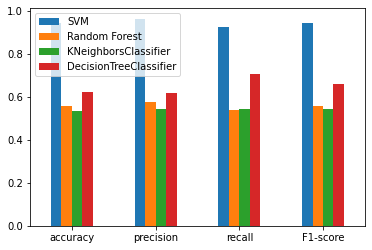

In [44]:
SVM_metrics = np.array([SVM_accuracy, SVM_precision, SVM_recall, SVM_f1_score])
RF_metrics = np.array([RF_accuracy, RF_precision, RF_recall, RF_f1_score])
KNN_metrics = np.array([KNN_accuracy, KNN_precision, KNN_recall, KNN_f1_score])
DEC_metrics = np.array([DEC_accuracy, DEC_precision, DEC_recall, DEC_f1_score])
index = ['accuracy', 'precision', 'recall', 'F1-score']
df_metrics = pd.DataFrame({'SVM': SVM_metrics, 'Random Forest': RF_metrics, 'KNeighborsClassifier' : KNN_metrics, 
                          'DecisionTreeClassifier' : DEC_metrics}, index =index)
df_metrics.plot.bar(rot=0)
#fig = px.bar(df_metrics)
#fig.legend(loc="lower right")
plt.show()


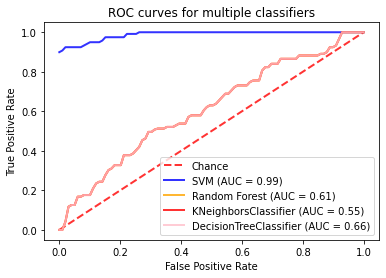

In [35]:
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
plt.plot(mean_fpr, SVM_tpr[0,:], lw=2, color='blue', label='SVM (AUC = %0.2f)' % (SVM_auc), alpha=0.8)
plt.plot(mean_fpr, RF_tpr[0,:], lw=2, color='orange', label='Random Forest (AUC = %0.2f)' % (RF_auc), alpha=0.8)
plt.plot(mean_fpr, RF_tpr[0,:], lw=2, color='red', label='KNeighborsClassifier (AUC = %0.2f)' % (KNN_auc), alpha=0.8)
plt.plot(mean_fpr, RF_tpr[0,:], lw=2, color='pink', label='DecisionTreeClassifier (AUC = %0.2f)' % (DEC_auc), alpha=0.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for multiple classifiers')
plt.legend(loc="lower right")
plt.show()

# Experiment 2


Question 2 – How does the performance change when additional information is added to the historical time series dataset, such as financial information about the company and sentiment value predicted by fin-BERT?

Normalizing / scaling close value between 0 to 1

In [ ]:
 #df_backup = df 
df_backup= df 
 df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Research Development,Income Before Tax,...,Net Tangible Assets,Net Receivables,Long Term Debt,Inventory,Accounts Payable,Target,Positive,Negative,Neutral,Label
0,2018-01-09,67.03,67.76,65.48,66.74,35733000.0,0.0,0.0,1.460000e+09,-1.005000e+09,...,4.573000e+09,9.490000e+08,8.461000e+09,3.113000e+09,3.405000e+09,0,0.051453,0.051624,0.896924,0
1,2018-01-29,67.97,70.17,67.66,69.91,23735500.0,0.0,0.0,1.460000e+09,-1.005000e+09,...,4.573000e+09,9.490000e+08,8.461000e+09,3.113000e+09,3.405000e+09,1,0.073506,0.036434,0.890060,1
2,2018-01-31,69.50,71.24,69.04,70.86,31070500.0,0.0,0.0,1.460000e+09,-1.005000e+09,...,4.573000e+09,9.490000e+08,8.461000e+09,3.113000e+09,3.405000e+09,1,0.057328,0.025493,0.917179,1
3,2018-03-07,65.09,66.50,64.35,66.46,25036500.0,0.0,0.0,1.460000e+09,-1.005000e+09,...,4.573000e+09,9.490000e+08,8.461000e+09,3.113000e+09,3.405000e+09,1,0.105883,0.032860,0.861258,1
4,2018-03-20,62.97,63.25,61.75,62.11,23821500.0,0.0,0.0,1.460000e+09,-1.005000e+09,...,4.573000e+09,9.490000e+08,8.461000e+09,3.113000e+09,3.405000e+09,0,0.041082,0.027480,0.931438,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,2022-05-19,707.00,734.00,694.11,709.42,30098900.0,0.0,0.0,2.593000e+09,6.343000e+09,...,2.973200e+10,1.986000e+09,4.285000e+09,5.757000e+09,1.002500e+10,1,0.079623,0.071458,0.848919,1
749,2022-05-20,713.99,721.58,633.00,663.90,48324400.0,0.0,0.0,2.593000e+09,6.343000e+09,...,2.973200e+10,1.986000e+09,4.285000e+09,5.757000e+09,1.002500e+10,0,0.073798,0.096653,0.829548,0
750,2022-05-23,655.02,679.96,638.06,674.90,29634500.0,0.0,0.0,2.593000e+09,6.343000e+09,...,2.973200e+10,1.986000e+09,4.285000e+09,5.757000e+09,1.002500e+10,1,0.075230,0.078415,0.846355,0
751,2022-05-24,653.53,653.92,620.57,628.16,29697500.0,0.0,0.0,2.593000e+09,6.343000e+09,...,2.973200e+10,1.986000e+09,4.285000e+09,5.757000e+09,1.002500e+10,0,0.085092,0.116204,0.798704,0


Splitting data

In [ ]:
# Normalize feature vector
#y = StandardScaler().fit(y.array.reshape(-1, 1) )
y = df['Close']
X = df.drop(['Date','Close'], axis = 1)
train_set, test_set= np.split(df, [int(.67 *len(df))])


In [ ]:
# Split the dataset
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

X_train_bkup = train_set
X_test_bkup = test_set
y_train = train_set['Close']
X_train = train_set.drop(columns=['Date','Close'])

y_test =  test_set['Close']
X_test = test_set.drop(columns=['Date','Close'])
scalar = StandardScaler()
#X_train = scalar.fit_transform(X_train)
#X_test = scalar.fit_transform(X_test)
#X_train = scalar.fit_transform(X_train)
#X_train = scalar.fit_transform(X_train)




## Regression

Preprocessing Pipeline

In [ ]:
# store a list with the names of all predictors

names_all = [c for c in  df if c not in ['Close','Date']]
names_no_outliers = list(set(names_all))


In [ ]:
class AddColumnNames(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return pd.DataFrame(data=X, columns=self.columns)

In [ ]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        return X[self.columns]

In [ ]:
preprocess_pipeline = make_pipeline(
    AddColumnNames(columns=names_all),
    FeatureUnion(transformer_list=[
        ("no_outlier_columns", make_pipeline(
            ColumnSelector(columns=names_no_outliers),
            StandardScaler()
        ))
    ])
)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(504, 52)
(504,)


In [ ]:
# create the pipeline
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                       ('regresson', RandomForestRegressor(n_estimators=10))])
# prepare a prameter grid
# note that __ can be used to specify the name of a parameter for a specific element in a pipeline
# note also that this is not an exhaustive list of the parameters of RandomForestClassifier and their possible values
N_FEATURES_OPTIONS = [2, 6, 11]
MAX_DEPTH_OPTIONS = [2, 4, 6, 8]

param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'regresson__max_depth': MAX_DEPTH_OPTIONS
    },
    {
        'reduce_dim': [RFE(svm.SVR(kernel='linear', gamma='auto')),RFE(LinearRegression())],
        'reduce_dim__n_features_to_select': N_FEATURES_OPTIONS,
        'regresson__max_depth': MAX_DEPTH_OPTIONS
    }  
]

search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5, refit=True)
search.fit(X_train, y_train)

print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
RF_best_params = search.best_params_
RF_best_model = search.best_estimator_

Best CV score = 0.132:
Best parameters:  {'reduce_dim': RFE(estimator=SVR(gamma='auto', kernel='linear'), n_features_to_select=2), 'reduce_dim__n_features_to_select': 2, 'regresson__max_depth': 8}


In [ ]:
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                       ('regresson', LinearRegression())])

N_FEATURES_OPTIONS = [2, 6, 11]
NORMALIZE_OPTIONS = [False, True]

param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'regresson__normalize': NORMALIZE_OPTIONS
    },
    {
        'reduce_dim': [RFE(svm.SVR(kernel='linear', gamma='auto')),RFE(LinearRegression())],
        'reduce_dim__n_features_to_select': N_FEATURES_OPTIONS,
        'regresson__normalize': NORMALIZE_OPTIONS
    }  
]

search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5, refit=True)
search.fit(X_train, y_train)
print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
LR_best_params = search.best_params_
LR_best_model = search.best_estimator_

Best CV score = 0.994:
Best parameters:  {'reduce_dim': RFE(estimator=SVR(gamma='auto', kernel='linear'), n_features_to_select=6), 'reduce_dim__n_features_to_select': 6, 'regresson__normalize': False}


In [ ]:
# create the pipeline
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), ('knn', KNeighborsRegressor())])

param_grid = {
'knn__n_neighbors': list(range(1, 31))
}

search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5, refit=True)
search.fit(X_train, y_train) #trainign happens here!

print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
KNN_best_params = search.best_params_
KNN_best_model = search.best_estimator_

Best CV score = -2.874:
Best parameters:  {'knn__n_neighbors': 1}


In [ ]:
# create the pipeline
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), ('dec', DecisionTreeRegressor())])


param_grid = {
'dec__criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"],
'dec__max_depth': [2,4,6,8,10]  
}

search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5, refit=True)
search.fit(X_train, y_train) #trainig happens here!

print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
DEC_best_params = search.best_params_
DEC_best_model = search.best_estimator_

Best CV score = 0.094:
Best parameters:  {'dec__criterion': 'squared_error', 'dec__max_depth': 10}


Compare Regressors on Test Set

In [ ]:
mean_fpr = np.linspace(start=0, stop=1, num=100)

In [ ]:
# model - a trained regression model

def evaluate_model(X_test, y_test, model):
    
    # compute predictiond for the test set
    _predicted_values = model.predict(X_test)
        
    # compute metrics
    _mse = mean_squared_error(y_test, _predicted_values)
    _mae = mean_absolute_error(y_test, _predicted_values)
    _r2 = r2_score(y_test, _predicted_values)
            
    return _mse, _mae, _r2, _predicted_values

In [ ]:
RF_mse, RF_mae, RF_r2, RF_predicted_values = evaluate_model(X_test, y_test, RF_best_model)
LR_mse, LR_mae, LR_r2, LR_predicted_values = evaluate_model(X_test, y_test, LR_best_model)
KNN_mse, KNN_mae, KNN_r2, KNN_predicted =  evaluate_model(X_test, y_test, KNN_best_model)
DEC_mse, DEC_mae, DEC_r2, DEC_predicted =  evaluate_model(X_test, y_test, DEC_best_model)



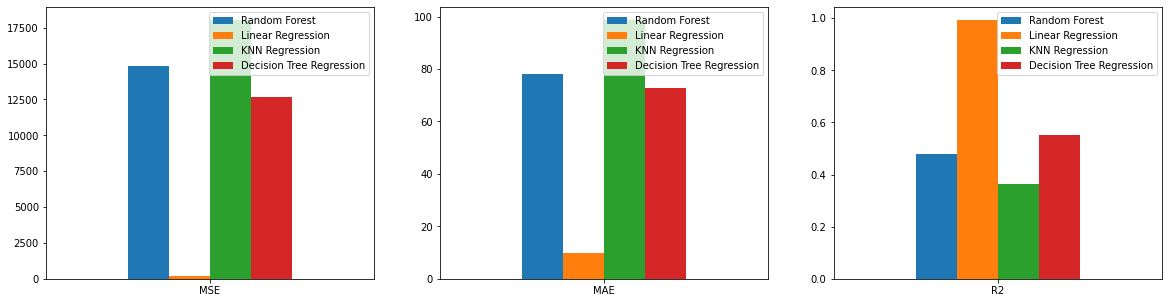

In [ ]:
df_mse = pd.DataFrame({'Random Forest': RF_mse, 'Linear Regression': LR_mse, 'KNN Regression' : KNN_mse, 'Decision Tree Regression' : DEC_mse}, index=['MSE'])
df_mae = pd.DataFrame({'Random Forest': RF_mae, 'Linear Regression': LR_mae, 'KNN Regression' : KNN_mae, 'Decision Tree Regression' : DEC_mae}, index=['MAE'])
df_r2 = pd.DataFrame({'Random Forest': RF_r2, 'Linear Regression': LR_r2, 'KNN Regression': KNN_r2, 'Decision Tree Regression' : DEC_r2}, index=['R2'])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

df_mse.plot.bar(rot=0, ax=axes[0])
df_mae.plot.bar(rot=0, ax=axes[1])
df_r2.plot.bar(rot=0, ax=axes[2])

plt.show()

In [ ]:
# function to remove the string 'regresson__' from the names of the best parameters
def transform(dict, prefix):
    dict_prefix = {key:value for key,value in dict.items() if prefix in key}
    return {key.replace(prefix,''):value for key,value in dict_prefix.items()}

pipe = make_pipeline(preprocess_pipeline, 
                     RF_best_params.get('reduce_dim'),
                     LinearRegression( **transform(LR_best_params, 'regresson__')))

final_model =pipe.fit(X, y)
filename = 'Experiment2_Regression.sav'
pickle.dump(final_model, open(filename, 'wb'))

In [ ]:
from itertools import cycle
import plotly.express as px
#LR_inverse =  scalar.inverse_transform(pd.DataFrame(LR_predicted_values))
#RF_inverse =  scalar.inverse_transform(pd.DataFrame(RF_predicted_values))
names = cycle(['LR','RF', 'KNN','DEC','Actual'])

fig =px.line(df, x=X_test_bkup.Date, y=[LR_predicted_values, RF_predicted_values,KNN_predicted, DEC_predicted, y_test],
            labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

## Classification

In [ ]:
df = df_backup


In [ ]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor, NeighborhoodComponentsAnalysis, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression

In [ ]:
# Declare feature vector and target variable
X = df.drop(['Date','Target'], axis = 1)
y = df['Target']
# Normalize feature vector
X = StandardScaler().fit_transform(X)


In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [ ]:
# create the pipeline
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), ('svm', svm.SVC(probability=True))])

# prepare a prameter grid
# note that __ can be used to specify the name of a parameter for a specific element in a pipeline
# note also that this is not an exhaustive list of the parameters of svn.SVC and their possible values

param_grid = {
    'svm__C': [0.1, 1, 10, 100],  
    'svm__gamma': [1, 0.1, 0.01, 0.001], 
    'svm__kernel': ['rbf', 'linear', 'poly']}

search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5, refit=True)
search.fit(X_train, y_train) #trainign happens here! SVM is trained 240 times

print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
SVM_best_params = search.best_params_
SVM_best_model = search.best_estimator_

Best CV score = 0.875:
Best parameters:  {'svm__C': 10, 'svm__gamma': 1, 'svm__kernel': 'poly'}


In [ ]:
# create the pipeline
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), ('rf', RandomForestClassifier())])

# prepare a prameter grid
# note that __ can be used to specify the name of a parameter for a specific element in a pipeline
# note also that this is not an exhaustive list of the parameters of RandomForestClassifier and their possible values
param_grid = {
    'rf__n_estimators' : [10,20,30],
    'rf__max_depth': [2, 4, 6, 8]
}

search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5, refit=True)
search.fit(X_train, y_train)
print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
RF_best_params = search.best_params_
RF_best_model = search.best_estimator_

Best CV score = 0.579:
Best parameters:  {'rf__max_depth': 6, 'rf__n_estimators': 20}


In [ ]:
# create the pipeline
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), ('knn', KNeighborsClassifier())])

param_grid = {
'knn__n_neighbors': list(range(1, 31))
}

search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5, refit=True)
search.fit(X_train, y_train) #trainign happens here!

print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
KNN_best_params = search.best_params_
KNN_best_model = search.best_estimator_

Best CV score = 0.558:
Best parameters:  {'knn__n_neighbors': 15}


In [ ]:
# create the pipeline
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), ('dec', DecisionTreeClassifier())])


param_grid = {
'dec__criterion': ["gini", "entropy"],
'dec__max_depth': [2,4,6,8,10]  
}

search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5, refit=True)
search.fit(X_train, y_train) #trainig happens here!

print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
DEC_best_params = search.best_params_
DEC_best_model = search.best_estimator_

Best CV score = 0.601:
Best parameters:  {'dec__criterion': 'entropy', 'dec__max_depth': 10}


Compare Classifiers on Test Set

In [ ]:
mean_fpr = np.linspace(start=0, stop=1, num=100)

In [ ]:
# model - a trained binary probabilistic classification model;
#         it is assumed that there are two classes: 0 and 1
#         and the classifier learns to predict probabilities for the examples to belong to class 1

def evaluate_model(X_test, y_test, model):
    # compute probabilistic predictiond for the evaluation set
    _probabilities = model.predict_proba(X_test)[:, 1]
    
    # compute exact predictiond for the evaluation set
    _predicted_values = model.predict(X_test)
        
    # compute accuracy
    _accuracy = accuracy_score(y_test, _predicted_values)
        
    # compute precision, recall and f1 score for class 1
    _precision, _recall, _f1_score, _ = precision_recall_fscore_support(y_test, _predicted_values, labels=[1])
    
    # compute fpr and tpr values for various thresholds 
    # by comparing the true target values to the predicted probabilities for class 1
    _fpr, _tpr, _ = roc_curve(y_test, _probabilities)
        
    # compute true positive rates for the values in the array mean_fpr
    _tpr_transformed = np.array([np.interp(mean_fpr, _fpr, _tpr)])
    
    # compute the area under the curve
    _auc = auc(_fpr, _tpr)
            
    return _accuracy, _precision[0], _recall[0], _f1_score[0], _tpr_transformed, _auc

In [ ]:
SVM_accuracy, SVM_precision, SVM_recall, SVM_f1_score, SVM_tpr, SVM_auc = evaluate_model(X_test, y_test, SVM_best_model)
RF_accuracy, RF_precision, RF_recall, RF_f1_score, RF_tpr, RF_auc = evaluate_model(X_test, y_test, RF_best_model)
KNN_accuracy, KNN_precision, KNN_recall, KNN_f1_score, KNN_tpr, KNN_auc = evaluate_model(X_test, y_test, KNN_best_model)
DEC_accuracy, DEC_precision, DEC_recall, DEC_f1_score, DEC_tpr, DEC_auc = evaluate_model(X_test, y_test, DEC_best_model)


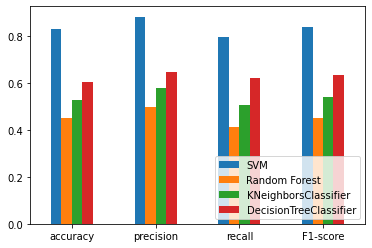

In [ ]:
SVM_metrics = np.array([SVM_accuracy, SVM_precision, SVM_recall, SVM_f1_score])
RF_metrics = np.array([RF_accuracy, RF_precision, RF_recall, RF_f1_score])
KNN_metrics = np.array([KNN_accuracy, KNN_precision, KNN_recall, KNN_f1_score])
DEC_metrics = np.array([DEC_accuracy, DEC_precision, DEC_recall, DEC_f1_score])
index = ['accuracy', 'precision', 'recall', 'F1-score']
df_metrics = pd.DataFrame({'SVM': SVM_metrics, 'Random Forest': RF_metrics, 'KNeighborsClassifier' : KNN_metrics, 
                          'DecisionTreeClassifier' : DEC_metrics}, index=index)
df_metrics.plot.bar(rot=0)
plt.legend(loc="lower right")
plt.show()

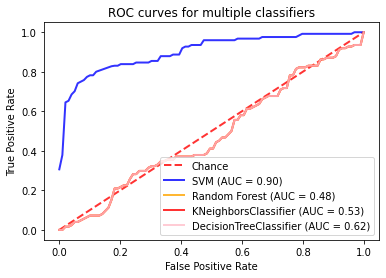

In [ ]:
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
plt.plot(mean_fpr, SVM_tpr[0,:], lw=2, color='blue', label='SVM (AUC = %0.2f)' % (SVM_auc), alpha=0.8)
plt.plot(mean_fpr, RF_tpr[0,:], lw=2, color='orange', label='Random Forest (AUC = %0.2f)' % (RF_auc), alpha=0.8)
plt.plot(mean_fpr, RF_tpr[0,:], lw=2, color='red', label='KNeighborsClassifier (AUC = %0.2f)' % (KNN_auc), alpha=0.8)
plt.plot(mean_fpr, RF_tpr[0,:], lw=2, color='pink', label='DecisionTreeClassifier (AUC = %0.2f)' % (DEC_auc), alpha=0.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for multiple classifiers')
plt.legend(loc="lower right")
plt.show()

# Experiment 3

Question 3 – How do the stock trends and the sentiment value predicted by Fin-BERT relate to one another? 

In [ ]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Research Development,Income Before Tax,...,Net Tangible Assets,Net Receivables,Long Term Debt,Inventory,Accounts Payable,Target,Positive,Negative,Neutral,Label
0,2018-01-09,67.03,67.76,65.48,66.74,35733000.0,0.0,0.0,1.460000e+09,-1.005000e+09,...,4.573000e+09,9.490000e+08,8.461000e+09,3.113000e+09,3.405000e+09,0,0.051453,0.051624,0.896924,0
1,2018-01-29,67.97,70.17,67.66,69.91,23735500.0,0.0,0.0,1.460000e+09,-1.005000e+09,...,4.573000e+09,9.490000e+08,8.461000e+09,3.113000e+09,3.405000e+09,1,0.073506,0.036434,0.890060,1
2,2018-01-31,69.50,71.24,69.04,70.86,31070500.0,0.0,0.0,1.460000e+09,-1.005000e+09,...,4.573000e+09,9.490000e+08,8.461000e+09,3.113000e+09,3.405000e+09,1,0.057328,0.025493,0.917179,1
3,2018-03-07,65.09,66.50,64.35,66.46,25036500.0,0.0,0.0,1.460000e+09,-1.005000e+09,...,4.573000e+09,9.490000e+08,8.461000e+09,3.113000e+09,3.405000e+09,1,0.105883,0.032860,0.861258,1
4,2018-03-20,62.97,63.25,61.75,62.11,23821500.0,0.0,0.0,1.460000e+09,-1.005000e+09,...,4.573000e+09,9.490000e+08,8.461000e+09,3.113000e+09,3.405000e+09,0,0.041082,0.027480,0.931438,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,2022-05-19,707.00,734.00,694.11,709.42,30098900.0,0.0,0.0,2.593000e+09,6.343000e+09,...,2.973200e+10,1.986000e+09,4.285000e+09,5.757000e+09,1.002500e+10,1,0.079623,0.071458,0.848919,1
749,2022-05-20,713.99,721.58,633.00,663.90,48324400.0,0.0,0.0,2.593000e+09,6.343000e+09,...,2.973200e+10,1.986000e+09,4.285000e+09,5.757000e+09,1.002500e+10,0,0.073798,0.096653,0.829548,0
750,2022-05-23,655.02,679.96,638.06,674.90,29634500.0,0.0,0.0,2.593000e+09,6.343000e+09,...,2.973200e+10,1.986000e+09,4.285000e+09,5.757000e+09,1.002500e+10,1,0.075230,0.078415,0.846355,0
751,2022-05-24,653.53,653.92,620.57,628.16,29697500.0,0.0,0.0,2.593000e+09,6.343000e+09,...,2.973200e+10,1.986000e+09,4.285000e+09,5.757000e+09,1.002500e+10,0,0.085092,0.116204,0.798704,0


In [ ]:
corr = df['Target'].corr(df['Label'])

In [ ]:
corr

0.09949141772273362